# 과제 #3

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from dtreeplt import dtreeplt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('data/breast-cancer.csv')
df.head()

,code,clump,cell_size,cell_shape,adhesion,single,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


1. code: id 번호
2. clump (clump 두께): 1 - 10
3. cell_size (세포 크기의 균등성): 1 - 10
4. cell_shape (세포 모양의 균등성): 1 - 10
5. adhesion (경계 유착 정도): 1 - 10
6. single (Single Epithelial Cell Size): 1 - 10
7. nuclei (Bare Nuclei, 핵 크기): 1 - 10
8. chromatin (Bland Chromatin): 1 - 10
9. nucleoli (Normal Nucleoli): 1 - 10
10. mitoses (Mitoses): 1 - 10
11. class: (2: 양성, 4: 악성)

## 의사 결정나무 (불순도는 gini를 사용)
- 최대나무 의사결정나무를 생성하여 시각화하라. 5겹 교차 검증을 실시하여 AUC 평균값
을 구하고, 입력변수의 중요도를 시각화하라.
- max_depth 수에 따른 5겹 교차 검증의 AUC 평균값 변화를 시각화하고, 가장 높은 분류
성과를 보이는 경우를 찾아라. 이때 5겹 교차 검증의 AUC 평균값을 구하고, 입력변수의
중요도를 시각화하라.

In [3]:
x = df.drop(['class', 'code'], axis=1)
y = df['class']

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(x,y)

DecisionTreeClassifier(max_depth=2)

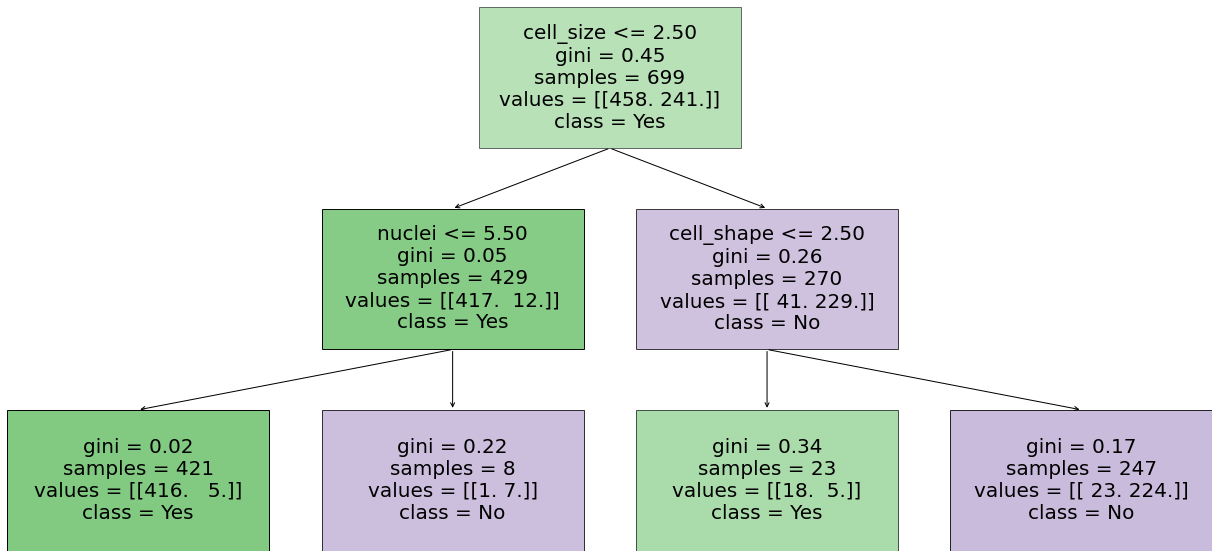

In [4]:
dtree = dtreeplt(model=tree, feature_names=x.columns, target_names=['Yes', 'No'])
fig = dtree.view()

In [5]:
tree_cv = DecisionTreeClassifier(criterion='gini', max_depth=2)
scores = cross_val_score(tree_cv, x, y, scoring='roc_auc', cv=5)
print("AUC of decision tree : {:.3f}".format(scores.mean()))

AUC of decision tree : 0.937


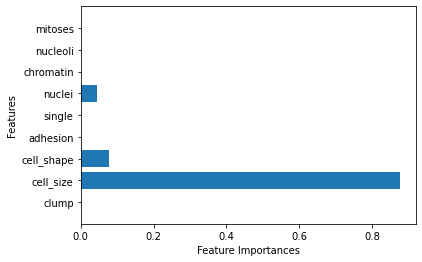

In [6]:
# 입력변수의 중요도 (max_depth=2)

def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    
plot_feature_importances(tree)

In [7]:
score_list = []
I = range(2,11)

for i in I:
    tree_cv = DecisionTreeClassifier(criterion='gini', max_depth=i)
    scores = cross_val_score(tree_cv, x, y, scoring='roc_auc', cv=5)
    score_list.append(scores.mean())
    print("AUC score with max_depth {}: {:.3f}".format(i, scores.mean()))

AUC score with max_depth 2: 0.937
AUC score with max_depth 3: 0.958
AUC score with max_depth 4: 0.959
AUC score with max_depth 5: 0.956
AUC score with max_depth 6: 0.951
AUC score with max_depth 7: 0.912
AUC score with max_depth 8: 0.929
AUC score with max_depth 9: 0.929
AUC score with max_depth 10: 0.921


In [12]:
# 가장 높은 분류 성과: max_depth = 4
tree_cv = DecisionTreeClassifier(criterion='gini', max_depth=4)
scores = cross_val_score(tree_cv, x, y, scoring='roc_auc', cv=5)
print("AUC of decision tree : {:.3f}".format(scores.mean()))

AUC of decision tree : 0.959


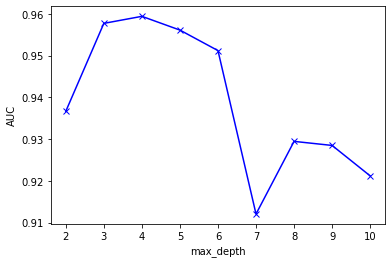

In [13]:
plt.plot(I, score_list, 'bx-')
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.show()

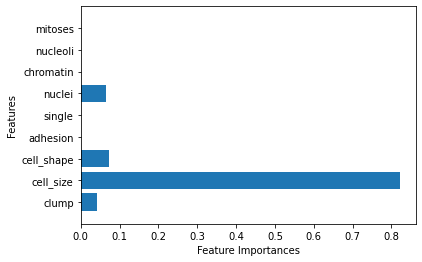

In [14]:
# 입력변수의 중요도 (max_depth=4)
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x,y)

def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    
plot_feature_importances(tree)

## 나이브 베이스 (GaussianNB 사용)
- 나이브 베이스 모형을 5겹 교차 검증하여 AUC 평균값을 구하라

In [15]:
x = df.drop(['class', 'code'], axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [16]:
# 예측
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4,
       2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2],
      dtype=int64)

In [17]:
# 성과 측정
gnb.score(x_test, y_test)

0.9542857142857143

In [18]:
# AUC 평균값
gnb = GaussianNB() 

scores = cross_val_score(gnb, x, y, scoring='roc_auc', cv=5)
scores.mean()

0.984816832550029

## 서포트 벡터 머신 (LinearSVC 사용, max_iter=1000000)
- C=1 인 경우의 LinearSVC 모형을 5겹 교차 검증하여 AUC 평균값을 구하라.
- C 하이퍼 파라메터를 튜닝하여 가장 좋은 성능을 보이는 C 값을 찾고, 이때의 5겹 교차
검증의 AUC 평균값을 구하라

In [19]:
x = df.drop(['class','code'], axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [20]:
# 예측
svm = LinearSVC(C=1)
svm.fit(x_train, y_train)
print("Predictions: ", svm.predict(x_test))
print("Accuracy: ", svm.score(x_test, y_test))

Predictions:  [2 2 2 4 2 2 2 2 4 2 2 2 4 4 2 2 2 4 2 4 4 2 4 2 2 2 2 4 2 4 4 2 2 2 2 4 2
 2 4 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 2 2
 2 4 2 2 2 4 2 4 2 2 2 2 4 2 2 2 2 2 4 2 2 2 4 2 2 4 2 2 2 4 2 2 2 2 4 4 2
 2 4 4 4 2 2 4 2 2 4 4 2 2 4 2 2 2 4 2 2 2 2 4 4 4 2 2 2 2 2 4 2 2 2 2 2 2
 2 2 4 4 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 4]
Accuracy:  0.9428571428571428


C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [21]:
# AUC 평균값
svm = LinearSVC(C=1)
scores = cross_val_score(svm, x, y, scoring='roc_auc', cv=5)
scores.mean()

C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

0.9945188102713611

In [22]:
# 하이퍼파라미터 튜닝 1
param_grid = [{'C': [1, 5, 10, 15, 20, 25, 30]}]
svm = LinearSVC(max_iter=1000000)

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='roc_auc', return_train_score=True)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=1000000),
             param_grid=[{'C': [1, 5, 10, 15, 20, 25, 30]}],
             return_train_score=True, scoring='roc_auc')

In [23]:
grid_search.best_params_

{'C': 1}

In [30]:
# 하이퍼파라미터 튜닝 2
param = [{'C': stats.uniform(0, 5)}]
svm = LinearSVC(max_iter=1000000)
n_iter = 50

random_search = RandomizedSearchCV(svm,
                                 param_distributions=param,
                                 n_iter=n_iter,
                                 scoring='roc_auc',
                                 return_train_score=True)
random_search.fit(x, y)

RandomizedSearchCV(estimator=LinearSVC(max_iter=1000000), n_iter=50,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000273801EEA88>}],
                   return_train_score=True, scoring='roc_auc')

In [31]:
random_search.best_params_

{'C': 1.7664113572011604}

In [32]:
# AUC 평균값
svm = LinearSVC(C=1.7)
scores = cross_val_score(svm, x, y, scoring='roc_auc', cv=5)
scores.mean()

C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

0.9947004673823662

## AUC 성능 비교 후 가장 우수한 모형찾기
- SVC의 성능이 가장 우수하다고 할 수 있다

In [33]:
# 의사결정나무
tree_cv = DecisionTreeClassifier(criterion='gini', max_depth=4)
scores = cross_val_score(tree_cv, x, y, scoring='roc_auc', cv=5)
print("AUC of Decision Tree : {:.3f}".format(scores.mean()))

# 나이브 베이스
gnb = GaussianNB() 
scores = cross_val_score(gnb, x, y, scoring='roc_auc', cv=5)
print("AUC of Naive Bayes : {:.3f}".format(scores.mean()))

# SVM
svm = LinearSVC(C=10)
scores = cross_val_score(svm, x, y, scoring='roc_auc', cv=5)
print("AUC of SVM : {:.3f}".format(scores.mean()))

AUC of Decision Tree : 0.957
AUC of Naive Bayes : 0.985
AUC of SVM : 0.994


C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration